<a href="https://colab.research.google.com/github/dbarenas/quants/blob/main/O'Reilly_Class_Principal_Components_As_Factor_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
#Import ML Libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Import Python libraries
import scipy.stats as scs
import numpy as np
import numpy.random as npr
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from datetime import datetime

#Import and Analyze Data

In [ ]:
!pip install yfinance

In [ ]:
#Download data from Yahoo Finance
import yfinance as yf
start = datetime(2017, 7, 16)
end = datetime(2021, 9, 15)
#TLT bond index; VEU is all world index ex US; GLD - gold index
data = yf.download('IWM JNK QQQ MGK EEM USO TLT VEU SPY GLD', start=start, end=end) 

In [ ]:
#Need to check for null values to avoid processing issues
data.isnull().values.any()

False

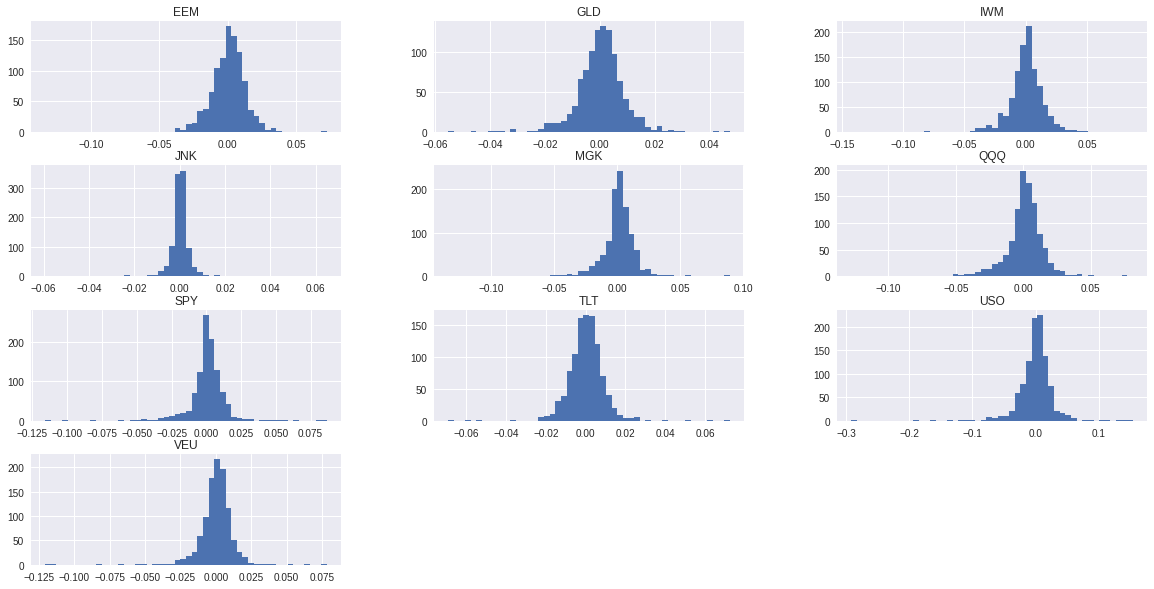

In [ ]:
#Calculate daily log returns and plot the histogram
rets = np.log(data['Adj Close']/data['Adj Close'].shift(1)) #Log returns make continuously compounded returns easy to manipulate
rets = rets.dropna()
rets.hist(bins=50, figsize = (20, 10));

In [ ]:
#Annualize mean returns
rets.mean()* 252 * 100

EEM     6.593884
GLD     8.757086
IWM    11.699705
JNK     4.895962
MGK    22.020356
QQQ    24.032582
SPY    16.001311
TLT     6.928856
USO   -10.275476
VEU     7.969664
dtype: float64

In [ ]:
#Compute the annualized covariance matrix 
covmatrix = rets.cov() * 252 #Covariance of an asset with itself is its variance (i.e. the square of its standard deviation or volatility)
covmatrix

,EEM,GLD,IWM,JNK,MGK,QQQ,SPY,TLT,USO,VEU
EEM,0.052522,0.004807,0.043248,0.014525,0.041502,0.042768,0.037538,-0.009760,0.037514,0.040650
GLD,0.004807,0.019222,0.002354,0.001621,0.003319,0.003514,0.002070,0.005327,0.000151,0.004082
IWM,0.043248,0.002354,0.064016,0.017711,0.045793,0.045777,0.045173,-0.013435,0.042286,0.041021
JNK,0.014525,0.001621,0.017711,0.008700,0.015731,0.015205,0.015168,-0.003701,0.015334,0.013890
MGK,0.041502,0.003319,0.045793,0.015731,0.052282,0.053600,0.044227,-0.010085,0.035738,0.036863
QQQ,0.042768,0.003514,0.045777,0.015205,0.053600,0.056653,0.044496,-0.010200,0.034314,0.036933
SPY,0.037538,0.002070,0.045173,0.015168,0.044227,0.044496,0.041046,-0.011252,0.035478,0.034933
TLT,-0.009760,0.005327,-0.013435,-0.003701,-0.010085,-0.010200,-0.011252,0.020482,-0.011937,-0.009746
USO,0.037514,0.000151,0.042286,0.015334,0.035738,0.034314,0.035478,-0.011937,0.198579,0.034170
VEU,0.040650,0.004082,0.041021,0.013890,0.036863,0.036933,0.034933,-0.009746,0.034170,0.036572


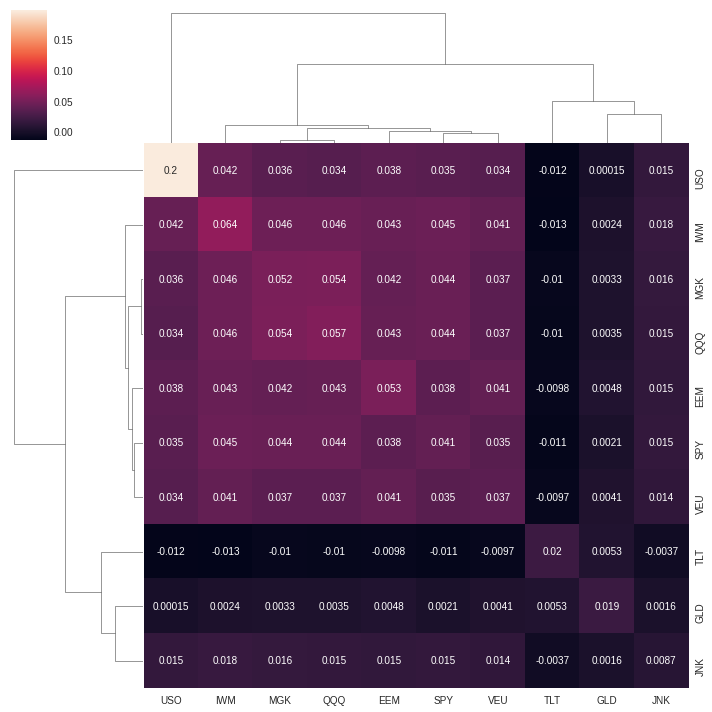

In [ ]:
#Visualize the covariance matrix
sns.clustermap(covmatrix, annot=True);

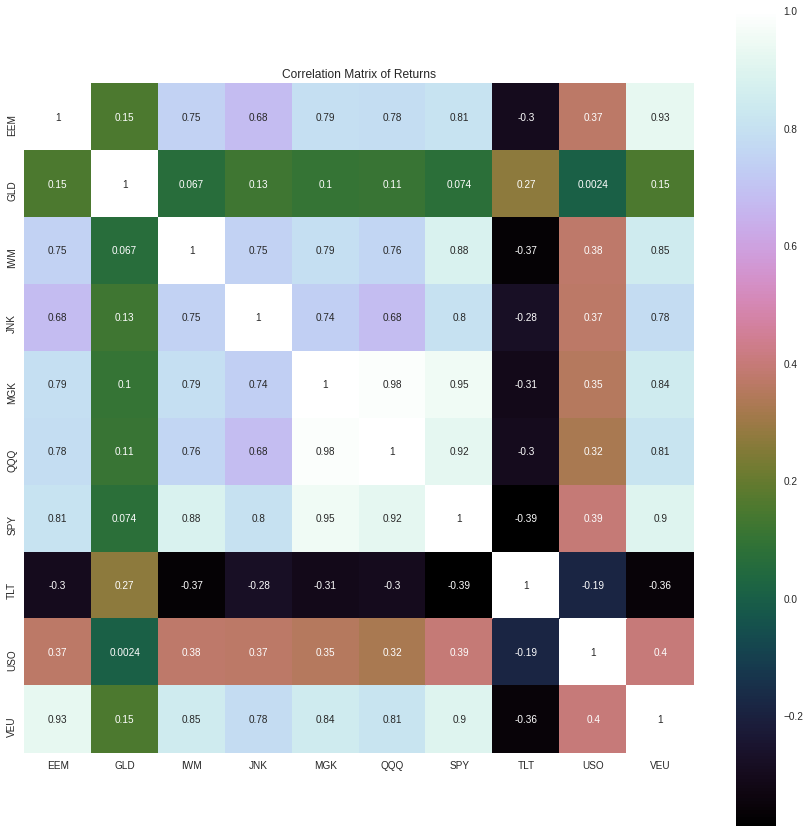

In [ ]:
#Compute and use a heatmap visualize the correlation matrix
corrmatrix = rets.corr()
plt.figure(figsize=(15, 15))
plt.title ('Correlation Matrix of Returns')
sns.heatmap(corrmatrix, vmax=1, square=True, annot=True, cmap='cubehelix');

#Engineer Features Using Principal Components

In [ ]:
standardized_rets = StandardScaler().fit_transform(rets) #Each feature/column now has a zero mean and unit variance

In [ ]:
pca = PCA().fit(standardized_rets) #Fit PCA model to the standardized returns to compute principal components
pca.components_.shape #Principal components are the rows and are linear combinations of the original 10 correlated features
#Each of the 10 principal component is uncorrelated and orthogonal to every other principal component in n-dimensional space

(10, 10)

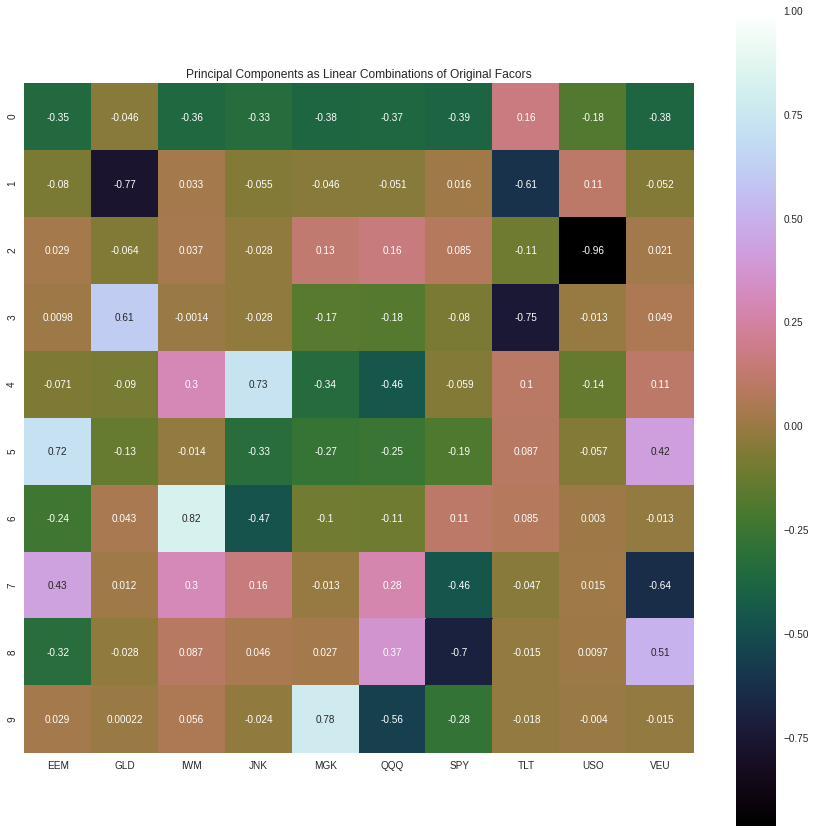

In [ ]:
#Create a data frame with all the principal components/Eigen Portfolios and visualize it with a heatmap
pca_array = pd.DataFrame(pca.components_, columns=rets.columns)
plt.figure(figsize=(15, 15))
plt.title ('Principal Components as Linear Combinations of Original Facors')
sns.heatmap(pca_array, vmax=1, square=True, annot=True, cmap='cubehelix');

In [ ]:
pca_array.head(3) #The first three principal components/Eigenvectors

,EEM,GLD,IWM,JNK,MGK,QQQ,SPY,TLT,USO,VEU
0,-0.354641,-0.045807,-0.358388,-0.334806,-0.376208,-0.366209,-0.388852,0.164110,-0.184814,-0.379023
1,-0.080162,-0.770822,0.032855,-0.055461,-0.046477,-0.051306,0.015851,-0.613137,0.107401,-0.052321
2,0.029122,-0.064131,0.037466,-0.027979,0.131851,0.159063,0.084623,-0.110502,-0.964551,0.020892


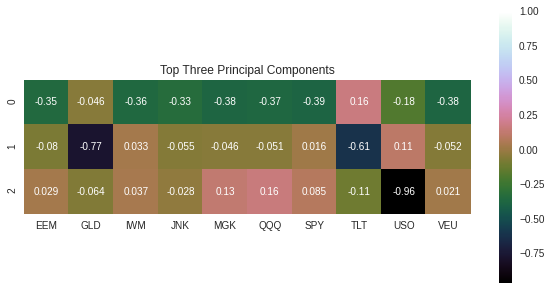

In [ ]:
plt.figure(figsize=(10, 5))
plt.title ('Top Three Principal Components')
sns.heatmap(pca_array.head(3), vmax=1, square=True, annot=True, cmap='cubehelix');

In [ ]:
print(pca.explained_variance_) #Variance/Eigenvalues of each principal component

[6.27741577 1.25866374 0.82008603 0.61096692 0.38819408 0.33641265
 0.22455622 0.05967643 0.02492827 0.00865101]


In [ ]:
print(pca.explained_variance_ratio_) #Explained variance per PCA component/percentage of total

[0.62714259 0.12574627 0.08193035 0.06103839 0.03878237 0.03360916
 0.02243419 0.00596195 0.00249045 0.00086428]


In [ ]:
pca = PCA(n_components=0.80) #Select the principal components that explain 80% of the variance in the returns
pca_rets = pca.fit_transform(standardized_rets) #Projects the standardized returns onto the top 3 principal components
pca_rets.shape

(1048, 3)

In [ ]:
factors = pd.DataFrame(pca_rets, index=rets.index)
factors.head()

,0,1,2
Date,,,
2017-07-18,-0.279779,-1.188843,-0.407548
2017-07-19,-1.125003,0.021119,-0.379840
2017-07-20,0.000294,-0.307723,0.226387
2017-07-21,0.630953,-1.076847,0.812706
2017-07-24,-0.373662,0.312427,-0.506839


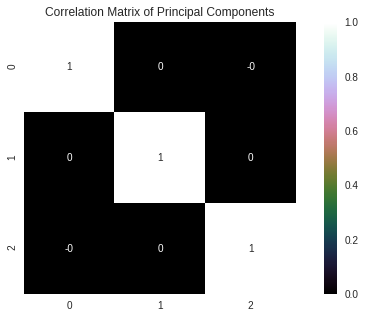

In [ ]:
#All risk factors/features are uncorrelated to one another
plt.figure(figsize=(10, 5))
plt.title ('Correlation Matrix of Principal Components')
sns.heatmap(factors.corr().round(1), vmax=1, square=True, annot=True, cmap='cubehelix');